In [74]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
from scipy.stats import norm

In [75]:

dollar_df = pd.read_excel("C:/Users/Asus/Downloads/tubesLidia/dollar-index-dataset.xlsx")
btc_df = pd.read_excel("C:/Users/Asus/Downloads/tubesLidia/BTC-dataset.xlsx")
merge_df = pd.read_csv("C:/Users/Asus/Downloads/tubesLidia/merged_new.csv")

In [77]:
dollar_df['Date'] = pd.to_datetime(dollar_df['Date'])
btc_df['date'] = pd.to_datetime(btc_df['date'])

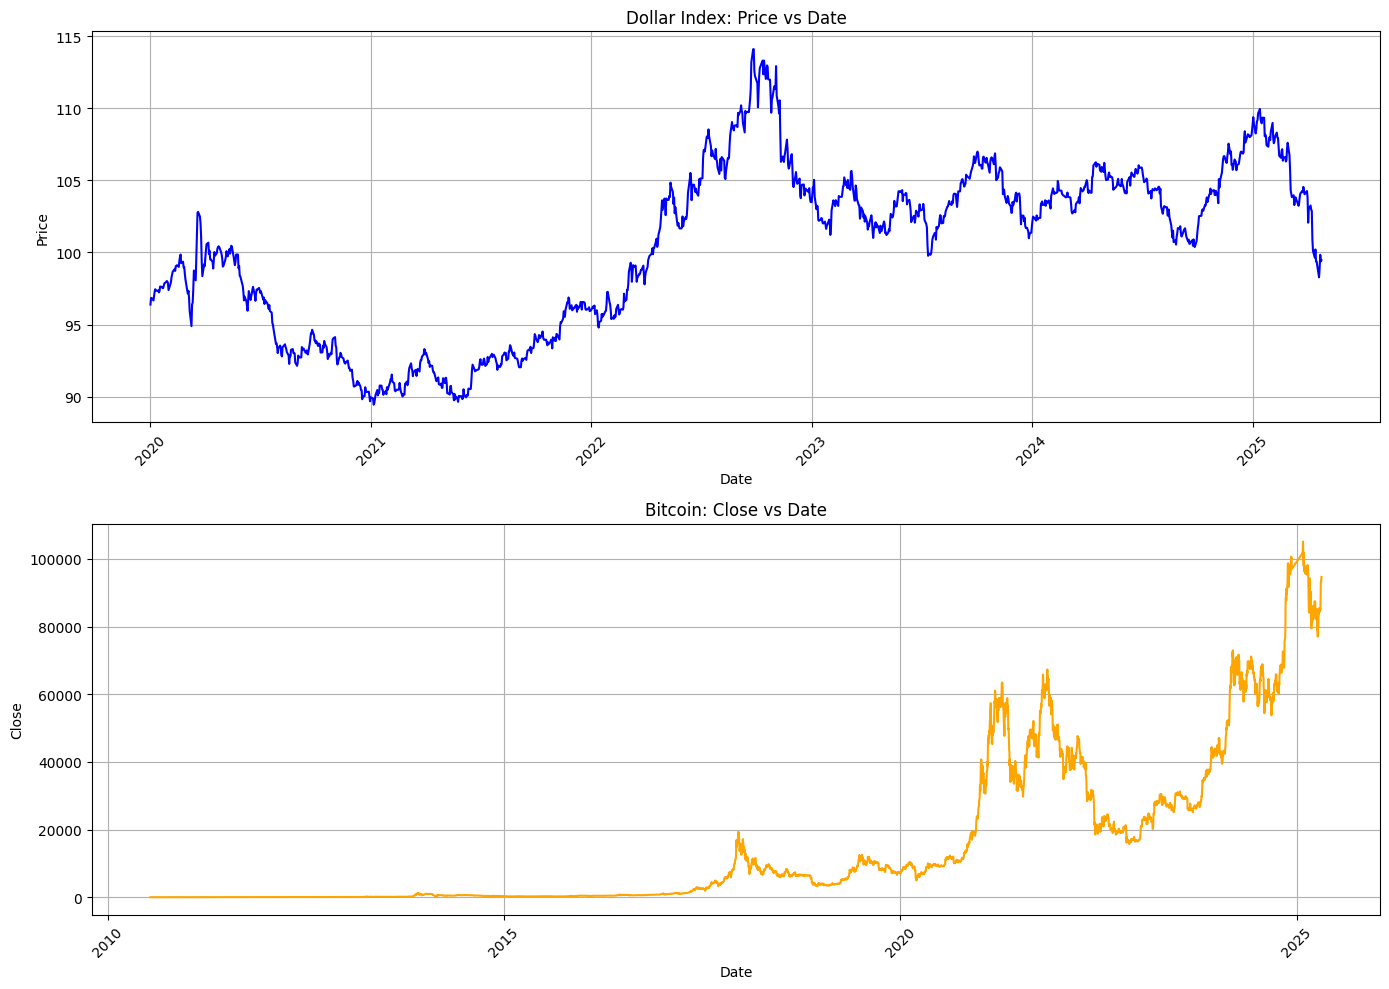

In [78]:
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

axs[0].plot(dollar_df['Date'], dollar_df['Price'], color='blue')
axs[0].set_title('Dollar Index: Price vs Date')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].grid(True)

axs[0].xaxis.set_major_locator(mdates.YearLocator(1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].tick_params(axis='x', rotation=45)


axs[1].plot(btc_df['date'], btc_df['close'], color='orange')
axs[1].set_title('Bitcoin: Close vs Date')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close')
axs[1].grid(True)

axs[1].xaxis.set_major_locator(mdates.YearLocator(5))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [79]:
dollar_prices = dollar_df['Price']
btc_close = btc_df['close']


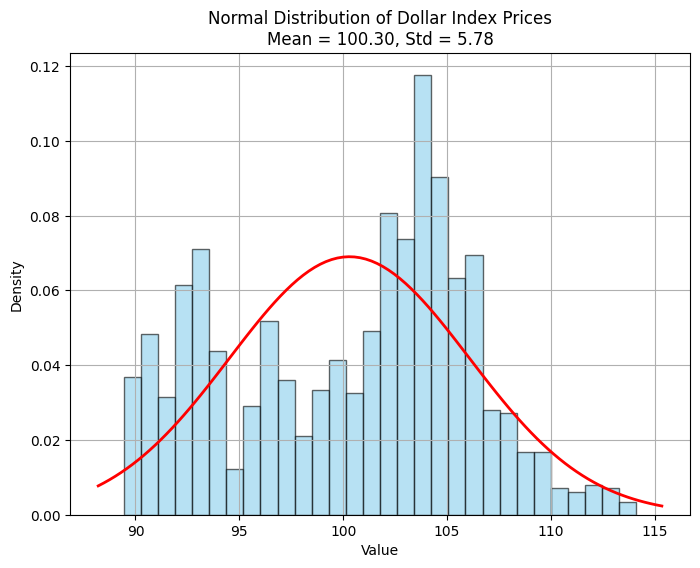

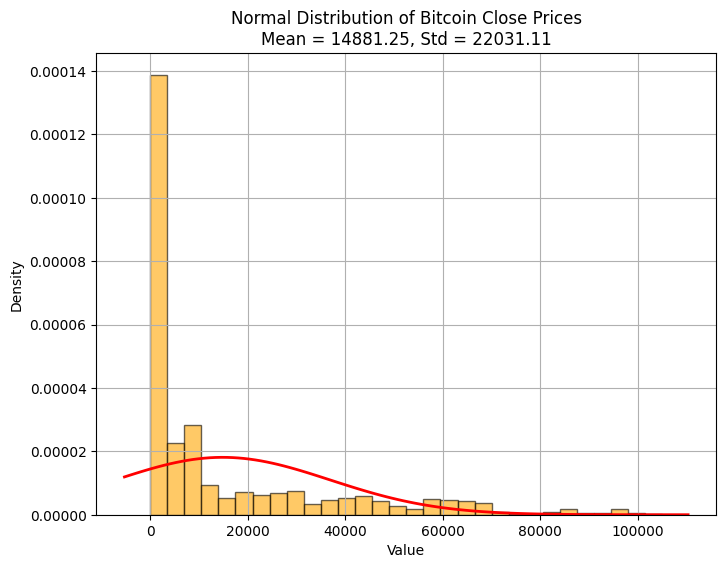

In [80]:
def plot_normal_distribution(data, title, color):
    mean, std = norm.fit(data)

    plt.figure(figsize=(8,6))
    plt.hist(data, bins=30, density=True, alpha=0.6, color=color, edgecolor='black')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'r', linewidth=2)

    plt.title(f'{title}\nMean = {mean:.2f}, Std = {std:.2f}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
plot_normal_distribution(dollar_prices, 'Normal Distribution of Dollar Index Prices', 'skyblue')
plot_normal_distribution(btc_close, 'Normal Distribution of Bitcoin Close Prices', 'orange')

In [ ]:
# Cek data kosong
print("Merge Data Missing Values:\n")
print(merge_df.isnull().sum())


# Cek Range Data

print("\nMerged Dataset Info:\n")
print(merge_df.describe())

print("\nMerged Dataset Info:\n")
print(merge_df.head())


Merge Dataset Missing Values:

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
ticker      0
open        0
high        0
low         0
close       0
dtype: int64

Merged Dataset Info:

            Price        Open        High         Low           open  \
count  766.000000  766.000000  766.000000  766.000000     766.000000   
mean   103.801410  103.783512  104.138708  103.445431   39786.083159   
std      3.309006    3.316269    3.376078    3.240996   19119.333096   
min     94.790000   94.870000   95.020000   94.630000   15720.500000   
25%    102.177500  102.142500  102.552500  101.880000   24312.825000   
50%    103.920000  103.910000  104.210000  103.565000   34286.000000   
75%    105.400000  105.357500  105.740000  105.100000   57500.075000   
max    114.110000  114.180000  114.780000  113.330000  100264.000000   

                high           low          close  
count     766.000000    766.000000     766.000000  
mean    40718.114883  3885

In [82]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'])
merge_df_2022 = merge_df[merge_df['Date'].dt.year == 2022]

print("\nMerged Dataset 2022 Info:\n")
print(merge_df_2022.head())


Merged Dataset 2022 Info:

          Date   Price    Open    High     Low Change % ticker     open  \
506 2022-12-30  103.52  103.95  104.10  103.39   -0.30%    BTC  16611.7   
507 2022-12-29  103.84  104.37  104.45  103.78   -0.60%    BTC  16509.7   
508 2022-12-28  104.46  104.33  104.56  103.85    0.27%    BTC  16684.4   
509 2022-12-27  104.18  104.12  104.40  103.89   -0.14%    BTC  16835.9   
510 2022-12-25  104.32  104.32  104.32  104.32    0.01%    BTC  16824.9   

        high      low    close  
506  16657.2  16329.4  16575.2  
507  16656.8  16481.7  16612.5  
508  16776.9  16462.9  16509.2  
509  16963.3  16595.4  16684.1  
510  16854.0  16725.8  16819.6  


In [ ]:
#Korelasi antara change dollar dan change bitcoin

#Konversi Change % jadi float
if merge_df_2022['Change %'].dtype == 'object':
    merge_df_2022['Change %'] = merge_df_2022['Change %'].str.replace('%','').astype(float) /100
else:
    merge_df_2022['Change %'] = merge_df_2022['Change %'] / 100

# Hitung change_btc
merge_df_2022['change_btc'] = (merge_df_2022['close'] - merge_df_2022['open']) / merge_df_2022['open']


# Korelasi
correlation_change = merge_df_2022['Change %'].corr(merge_df_2022['change_btc'])
print(f'Korelasi antara Dollar Index Change % dan Bitcoin Change %: {correlation_change:.4f}')


Korelasi antara Dollar Index Change % dan Bitcoin Change %: -0.3334


C:\Users\Asus\AppData\Local\Temp\ipykernel_15812\2361198053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df_2022['Change %'] = merge_df_2022['Change %'].str.replace('%','').astype(float) /100
C:\Users\Asus\AppData\Local\Temp\ipykernel_15812\2361198053.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df_2022['change_btc'] = (merge_df_2022['close'] - merge_df_2022['open']) / merge_df_2022['open']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# X dan y
X = merge_df_2022[['Change %']]    # variabel independent
y = merge_df_2022['change_btc']     # target dependent

# Split data train-test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model regresi
model = LinearRegression()
model.fit(X_train, y_train)

#Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) tahun 2022: {mse:.8f}')
print(f'R² Score tahun 2022: {r2:.4f}')
print(f'Intercept: {model.intercept_:.6f}')
print(f'Coefficient: {model.coef_[0]:.6f}')


Mean Squared Error (MSE) tahun 2022: 0.00107172
R² Score tahun 2022: 0.1677
Intercept: -0.002075
Coefficient: -1.887790


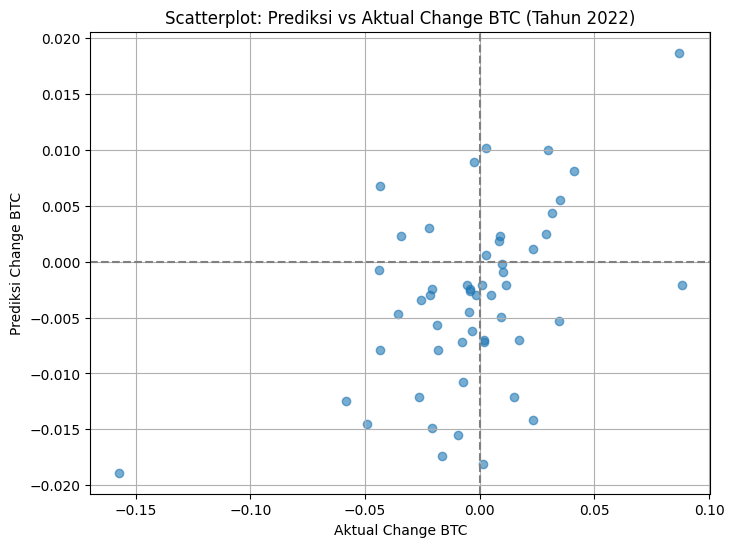

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Scatterplot: Prediksi vs Aktual Change BTC (Tahun 2022)')
plt.xlabel('Aktual Change BTC')
plt.ylabel('Prediksi Change BTC')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')  # garis horizontal nol
plt.axvline(0, color='grey', linestyle='--')  # garis vertikal nol
plt.show()


In [87]:
# Filter dari Maret (03) sampai September (09)
merge_df_2022_sub = merge_df_2022[
    (merge_df_2022['Date'].dt.month >= 3) & (merge_df_2022['Date'].dt.month <= 9)
].copy()

# Cek hasil
print("\nData Maret - September 2022:\n")
print(merge_df_2022_sub.head())
print(f"Jumlah data: {len(merge_df_2022_sub)}")


Data Maret - September 2022:

          Date   Price    Open    High     Low  Change % ticker     open  \
571 2022-09-30  112.12  111.75  112.67  111.58   -0.0012    BTC  19431.3   
572 2022-09-29  112.25  113.01  113.79  111.77   -0.0031    BTC  19618.9   
573 2022-09-28  112.60  114.18  114.78  112.56   -0.0132    BTC  18982.9   
574 2022-09-27  114.11  114.02  114.47  113.33    0.0000    BTC  19098.0   
575 2022-09-26  114.10  113.02  114.53  112.94    0.0080    BTC  18740.1   

        high      low    close  change_btc  
571  20179.6  19163.8  19360.2   -0.003659  
572  19665.1  18845.6  19432.8   -0.009486  
573  19774.4  18473.2  19618.8    0.033499  
574  20383.3  18818.1  18992.7   -0.005514  
575  19319.1  18634.4  19096.4    0.019013  
Jumlah data: 154


In [ ]:
# Memastikan bahwa 'Change %' adalah float
if merge_df_2022_sub['Change %'].dtype == 'object':
    merge_df_2022_sub['Change %'] = merge_df_2022_sub['Change %'].str.replace('%','').astype(float) / 100
else:
    merge_df_2022_sub['Change %'] = merge_df_2022_sub['Change %'] / 100

# Hitung change_btc
merge_df_2022_sub['change_btc'] = (merge_df_2022_sub['close'] - merge_df_2022_sub['open']) / merge_df_2022_sub['open']

correlation_change_sub = merge_df_2022_sub['Change %'].corr(merge_df_2022_sub['change_btc'])
print(f'Korelasi antara Dollar Index Change % dan Bitcoin Change % (Maret–September 2022): {correlation_change_sub:.4f}')



Korelasi antara Dollar Index Change % dan Bitcoin Change % (Maret–September 2022): -0.3494


In [89]:
# Hitung Moving Average 5 Hari
merge_df_2022_avg5 = merge_df_2022_sub.copy()
merge_df_2022_avg5['Change % MA5'] = merge_df_2022['Change %'].rolling(window=5).mean()
merge_df_2022_avg5['change_btc MA5'] = merge_df_2022['change_btc'].rolling(window=5).mean()

# Drop NaN karena awal rolling pasti ada NaN
merge_df_2022_avg5_clean = merge_df_2022_avg5.dropna()

# Korelasi baru
correlation_ma5 = merge_df_2022_avg5_clean['Change % MA5'].corr(merge_df_2022_avg5_clean['change_btc MA5'])
print(f'Korelasi setelah Moving Average 5 Hari: {correlation_ma5:.4f}')


Korelasi setelah Moving Average 5 Hari: -0.3993


In [ ]:
# Tentukan variabel x dan y
X = merge_df_2022_avg5_clean[['Change %']]    # variabel independent
y = merge_df_2022_avg5_clean['change_btc']     # target dependent

# split datatest 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

#Prediksi
y_pred = model.predict(X_test)

#Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) tahun 2022: {mse:.8f}')
print(f'R² Score tahun 2022: {r2:.4f}')
print(f'Intercept: {model.intercept_:.6f}')
print(f'Coefficient: {model.coef_[0]:.6f}')

Mean Squared Error (MSE) tahun 2022: 0.00118587
R² Score tahun 2022: 0.1323
Intercept: -0.002812
Coefficient: -233.047239


In [ ]:
#Log Transformasi
merge_df_2022_log = merge_df_2022.copy()
merge_df_2022_log['log_change_btc'] = np.log1p(merge_df_2022_log['change_btc'])
merge_df_2022_log['log_change_dxy'] = np.log1p(merge_df_2022_log['Change %'])

correlation_log = merge_df_2022_log['log_change_dxy'].corr(merge_df_2022_log['log_change_btc'])
print(f'Korelasi setelah Log Transformation: {correlation_log:.4f}')